## Load libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load Data

In [3]:
loan_df = pd.read_csv("loan.csv")
loan_df.shape

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

## Data Understanding

In [4]:
print(f"Shape: {loan_df.shape}")

Shape: (39717, 111)


In [5]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
id_cols = ["id", "member_id"]
print(f"ID columns: {id_cols}")

ID columns: ['id', 'member_id']


In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
print("Observed data types:")
loan_df.dtypes.value_counts()

Observed data types:


float64    74
object     24
int64      13
dtype: int64

In [9]:
cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_col = loan_df.dtypes[loan_df.dtypes != "object"].index

print(f"Initial Observations:")
print(f"# of Category columns: {len(cat_cols)}")
print(f"# of Continuous columns: {len(continuous_col)}")

Initial Observations:
# of Category columns: 24
# of Continuous columns: 87


## Data Cleaning

### Drop id columns

In [10]:
id_cols = ["id", "member_id"]
loan_df.drop(id_cols,axis=1, inplace=True)
loan_df.shape

(39717, 109)

### Drop columns with >40% null values

In [11]:
ms_values = round(loan_df.isnull().sum() / loan_df.shape[0] * 100)
drop_cols = ms_values[ms_values > 40].index

print(f"{len(drop_cols)} columns will be dropped")
print(drop_cols)

loan_df.drop(drop_cols,axis=1, inplace=True)
print(f"Shape:{loan_df.shape}")

57 columns will be dropped
Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_t

### Drop Rows with min 1 null value

In [12]:
drop_rows = loan_df[loan_df.isna().sum(axis=1) > 0].index
print(f"# of rows to be dropped: {len(drop_rows)}")

# of rows to be dropped: 15311


In [13]:
loan_df = loan_df[loan_df.isna().sum(axis=1) == 0]
loan_df.shape

(24406, 52)

## Data Manipulation

### Category Columns

In [14]:
cat_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

#### Using value_counts(), find & drop the columns that have only one unique value

In [15]:
drop_cols = ["pymnt_plan","initial_list_status","application_type"]
loan_df.drop(drop_cols,axis=1, inplace=True)

#### Using dtypes & value_counts(), find & update columns that wrongly classified

In [16]:
loan_df.term.value_counts()

 36 months    17844
 60 months     6562
Name: term, dtype: int64

In [17]:
loan_df['term'] = loan_df.term.apply(lambda x: int(x[1:3]))

In [18]:
loan_df["int_rate"] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [19]:
loan_df["emp_length"].value_counts()

10+ years    5382
2 years      2939
< 1 year     2797
3 years      2648
1 year       2202
4 years      2162
5 years      2060
6 years      1362
7 years      1129
8 years       918
9 years       807
Name: emp_length, dtype: int64

In [20]:
## Since we dont have the data to differentiate emp_length above 10 years, lets consider them together

loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: 10 if x == "10+ years" 
                                            else 1 if x == "< 1 year"
                                            else int(x[0]) )

In [21]:
loan_df["revol_util"]= loan_df["revol_util"].apply(lambda x: float(x[:-1]))

In [22]:
# to-do
# title zip_code

### Continuous Columns

In [23]:
continuous_col

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

#### Using value_counts(), find & drop the columns that have only one unique value

In [24]:
drop_cols = ["chargeoff_within_12_mths", "delinq_amnt" ,"tax_liens" ,
        "collections_12_mths_ex_med","policy_code" ,"acc_now_delinq"]
loan_df.drop(drop_cols,axis=1, inplace=True)

### Date columns : last_pymnt_d, last_credit_pull_d, issue_d earliest_cr_line

In [25]:
fmt = "%b-%y"
loan_df["last_pymnt_d"] = pd.to_datetime(loan_df["last_pymnt_d"],format=fmt)

In [26]:
fmt = "%b-%y"
loan_df["last_credit_pull_d"] = pd.to_datetime(loan_df["last_credit_pull_d"],format=fmt)

In [27]:
fmt = "%b-%y"
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"],format=fmt)

In [28]:
fmt = "%b-%y"
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"],format=fmt)

### Outlier analysis

In [29]:
## annual_inc seems to have outiers

### Final Dataset after Manipulation

In [30]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24406 entries, 1 to 39623
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                24406 non-null  int64         
 1   funded_amnt              24406 non-null  int64         
 2   funded_amnt_inv          24406 non-null  float64       
 3   term                     24406 non-null  int64         
 4   int_rate                 24406 non-null  float64       
 5   installment              24406 non-null  float64       
 6   grade                    24406 non-null  object        
 7   sub_grade                24406 non-null  object        
 8   emp_title                24406 non-null  object        
 9   emp_length               24406 non-null  int64         
 10  home_ownership           24406 non-null  object        
 11  annual_inc               24406 non-null  float64       
 12  verification_status      24406 n

In [31]:
print(f"Shape: {loan_df.shape}")

cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_cols = loan_df.dtypes[(loan_df.dtypes == "int64") | (loan_df.dtypes == "float64")].index
date_cols = loan_df.dtypes[loan_df.dtypes == "datetime64[ns]"].index

print(f"# of Category columns: {len(cat_cols)}")
print(f"# of Continuous columns: {len(continuous_cols)}")
print(f"# of Date Columns: {len(date_cols)}")

Shape: (24406, 43)
# of Category columns: 12
# of Continuous columns: 27
# of Date Columns: 4


## Data Analysis

### Univariate Analysis & Segmented Univariate Analysis : identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

#### Univariate Analysis

#### Segmented Univariate Analysis

In [32]:
grouped_by_loan_status = loan_df.groupby(by="loan_status")

In [33]:
grouped_by_loan_status.mean()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,12788.423978,12381.430288,11472.953405,46.622596,13.927332,353.269195,5.208233,63528.798723,14.191547,0.147236,1.063702,9.474760,0.082933,14138.293870,55.601487,22.016526,0.000000,0.00000,7207.862177,6735.506016,4178.293807,2323.780108,4.582418,701.205783,95.145733,348.237752,0.064002
Current,17591.568483,17025.441826,16832.051122,60.000000,15.058895,409.057261,6.125184,77067.736907,14.932725,0.150221,0.773196,9.983800,0.042710,16822.611193,54.512828,23.594993,1849.965331,1840.13863,22597.434890,22288.691105,15175.476834,7420.810898,1.147190,0.000000,0.000000,411.050574,0.032401
Fully Paid,11243.241090,10962.030001,10440.518991,41.188490,11.692243,331.030237,4.940389,70032.077630,13.305682,0.140546,0.850336,9.383303,0.050199,13481.556694,47.789902,22.354282,0.000000,0.00000,13150.183713,12507.604938,10962.025991,2187.270820,0.887038,0.000000,0.000000,3249.902065,0.037845


In [34]:
grouped_by_loan_status.median()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,11200.0,10800.0,10000.000000,36.0,13.67,315.49,5.0,54600.0,14.54,0.0,1.0,9.0,0.0,9924.5,58.2,20.0,0.00,0.00,5214.2650,4776.645,2911.09,1435.67,0.0,173.1,2.78415,259.65,0.0
Current,16000.0,16000.0,15750.000000,60.0,14.65,376.16,6.0,66000.0,15.36,0.0,0.0,9.0,0.0,13065.0,56.7,22.0,1608.53,1605.98,20731.9100,20553.140,13943.15,6721.76,0.0,0.0,0.00000,377.49,0.0
Fully Paid,10000.0,10000.0,9113.068391,36.0,11.49,291.76,4.0,60000.0,13.41,0.0,1.0,9.0,0.0,9044.0,47.8,21.0,0.00,0.00,11132.9932,10561.780,10000.00,1398.32,0.0,0.0,0.00000,917.11,0.0


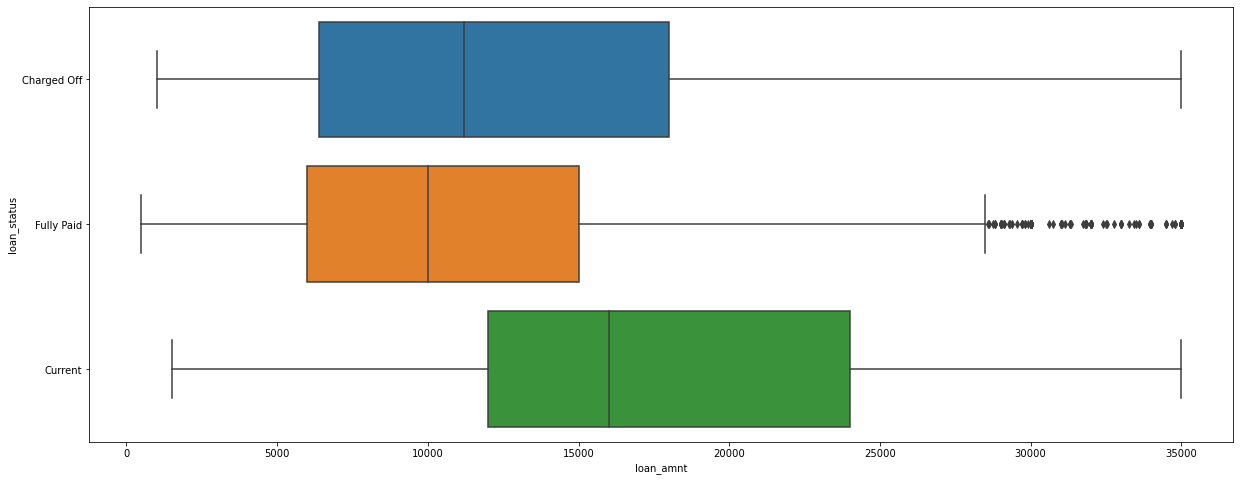

In [35]:
col = "loan_amnt" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue])
plt.show()

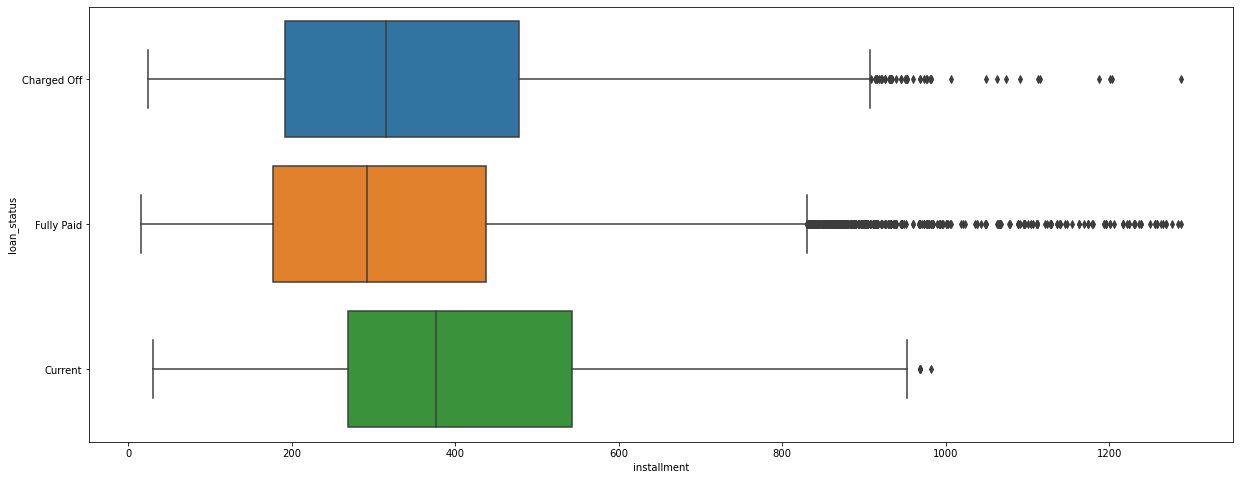

In [36]:
col = "installment"
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue])
plt.show()

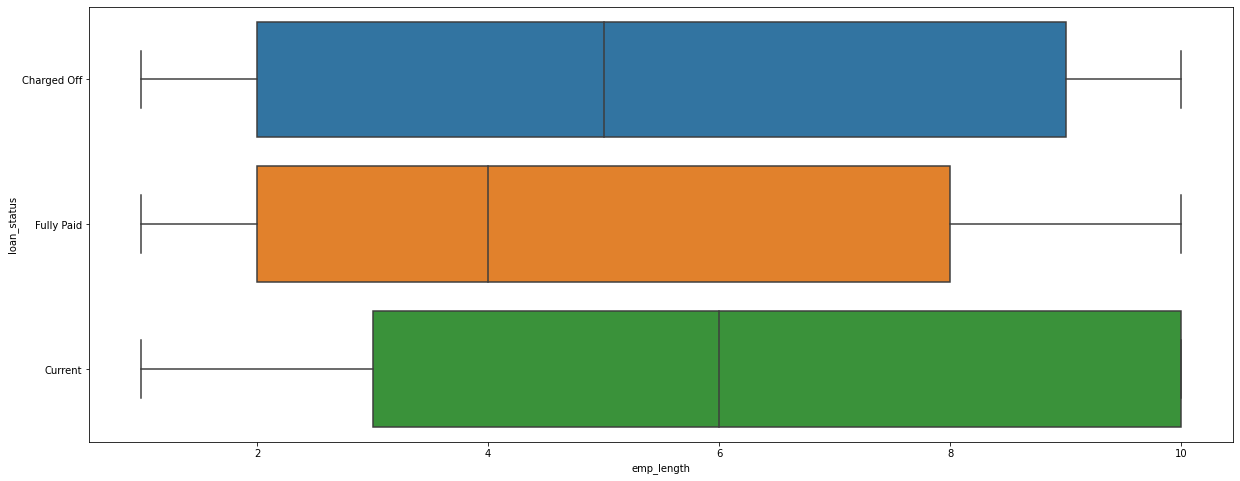

In [37]:
col = "emp_length" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue])
plt.show()

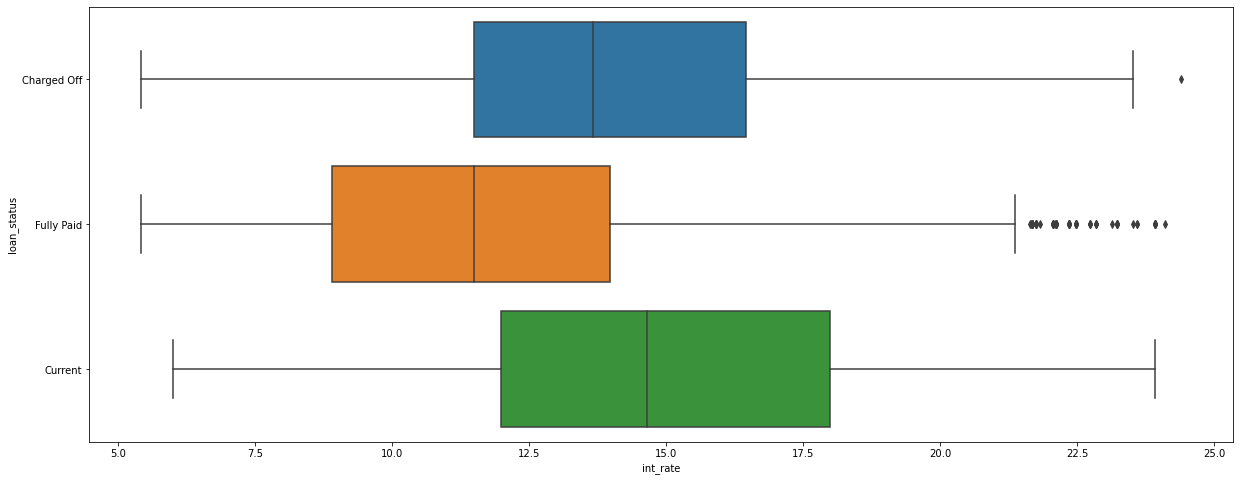

In [38]:
# high int_rate has a significant difference

col = "int_rate" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue])
plt.show()

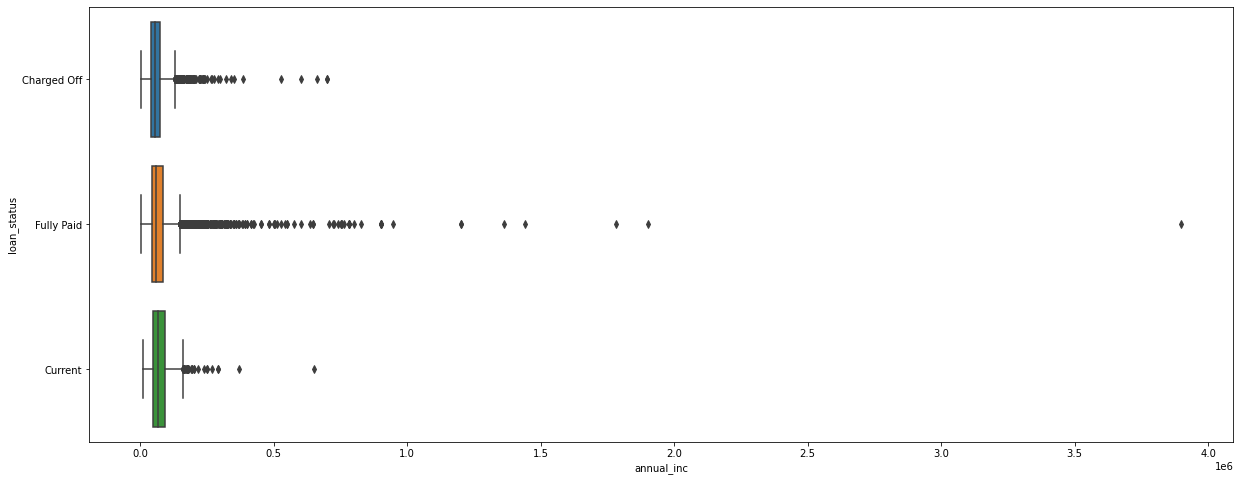

In [39]:
col = "annual_inc" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue])
plt.show()

##### Observation:
Significant differences found in "int_rate", "annual_inc", "loan_amnt", "revol_util", "total_rec_late_fee"

In [40]:
# purpose has signigicant difference
## better results if we drop loan_status current
pd.crosstab(loan_df["purpose"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,0.089485,0.027964,0.882550
credit_card,0.102881,0.019310,0.877809
debt_consolidation,0.143479,0.029771,0.826751
educational,0.166667,0.000000,0.833333
home_improvement,0.110612,0.035935,0.853453
house,0.149020,0.031373,0.819608
major_purchase,0.094847,0.018671,0.886482
medical,0.163728,0.020151,0.816121
moving,0.129032,0.006452,0.864516


In [41]:
pd.crosstab(loan_df["loan_status"], [loan_df["home_ownership"]], normalize="columns")

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,0.129922,0.191489,0.135702,0.141957
Current,0.036053,0.000000,0.025626,0.020766
Fully Paid,0.834025,0.808511,0.838672,0.837277


In [42]:
# Significant finding
pd.crosstab(loan_df["loan_status"], [loan_df["grade"]], normalize="columns")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,0.054054,0.113667,0.156976,0.205003,0.248322,0.298003,0.307292
Current,0.003626,0.028011,0.031157,0.041489,0.059284,0.061444,0.057292
Fully Paid,0.942320,0.858322,0.811867,0.753508,0.692394,0.640553,0.635417


In [43]:
#Significant
pd.crosstab(loan_df["sub_grade"], [loan_df["loan_status"]], normalize="index")


loan_status,Charged Off,Current,Fully Paid
sub_grade,,,
A1,0.026801,0.000000,0.973199
A2,0.049826,0.000000,0.950174
A3,0.046642,0.000000,0.953358
A4,0.052866,0.004452,0.942682
A5,0.071305,0.008051,0.920644
B1,0.085343,0.013915,0.900742
B2,0.101059,0.026080,0.872861
B3,0.113931,0.029893,0.856176
B4,0.124060,0.032581,0.843358


In [44]:
#Significant
pd.crosstab(loan_df["addr_state"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Current,Fully Paid
addr_state,,,
AK,0.230769,0.000000,0.769231
AL,0.120438,0.047445,0.832117
AR,0.122581,0.032258,0.845161
AZ,0.138837,0.031895,0.829268
CA,0.150103,0.019509,0.830388
CO,0.123232,0.038384,0.838384
CT,0.136054,0.038549,0.825397
DC,0.090226,0.015038,0.894737
DE,0.082192,0.013699,0.904110


In [45]:
# Significant
pd.crosstab(loan_df["zip_code"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Current,Fully Paid
zip_code,,,
007xx,0.000000,0.000000,1.000000
010xx,0.107143,0.000000,0.892857
011xx,0.111111,0.000000,0.888889
012xx,0.090909,0.090909,0.818182
013xx,0.214286,0.071429,0.714286
...,...,...,...
995xx,0.157895,0.000000,0.842105
996xx,0.250000,0.000000,0.750000
997xx,0.333333,0.000000,0.666667


In [46]:
tab = pd.crosstab(loan_df["zip_code"], [loan_df["loan_status"]], normalize="index")
tab[tab["Charged Off"] > 0.2].shape

(146, 3)

### Derived Metrics: 

#### Business-driven

In [47]:
loan_df["emi_burden"] = round(loan_df["annual_inc"] / loan_df["installment"])

In [48]:
loan_df.groupby(by="loan_status")["emi_burden"].mean()

loan_status
Charged Off    239.176983
Current        236.284242
Fully Paid     290.875386
Name: emi_burden, dtype: float64

In [49]:
loan_df.groupby(by="loan_status")["emi_burden"].median()

# significant obv

loan_status
Charged Off    173.0
Current        176.0
Fully Paid     205.0
Name: emi_burden, dtype: float64

In [50]:
loan_df["inc_loan_ratio"] = round(loan_df["annual_inc"] / loan_df["loan_amnt"] )

In [51]:
loan_df.groupby("loan_status")["inc_loan_ratio"].mean()

loan_status
Charged Off    6.885216
Current        5.474227
Fully Paid     8.763077
Name: inc_loan_ratio, dtype: float64

In [52]:
loan_df.groupby("loan_status")["inc_loan_ratio"].median()

loan_status
Charged Off    5.0
Current        4.0
Fully Paid     6.0
Name: inc_loan_ratio, dtype: float64

#### Type_driven

#### Data-driven

In [53]:
# convert term back to category

### Bi-variate Analysis

In [54]:
## loan_amnt vs interest rate

In [55]:
## loan_amnt vs term vs others
pd.crosstab(loan_df["loan_status"], [loan_df["term"]], normalize="columns")

term,36,60
loan_status,,
Charged Off,0.103957,0.224474
Current,0.000000,0.103475
Fully Paid,0.896043,0.672051


In [56]:
loan_df.groupby(by=["loan_status", "term"])["int_rate"].mean()

loan_status  term
Charged Off  36      12.491450
             60      15.735587
Current      60      15.058895
Fully Paid   36      10.941388
             60      14.414558
Name: int_rate, dtype: float64

In [57]:
loan_df.groupby(by=["loan_status", "grade"])["loan_amnt"].mean()

loan_status  grade
Charged Off  A         8413.033537
             B        11614.791667
             C        11592.477876
             D        12856.956845
             E        16401.407658
             F        19839.175258
             G        18702.118644
Current      A        10868.181818
             B        17877.657005
             C        16625.159236
             D        15643.382353
             E        19281.839623
             F        24601.250000
             G        21756.818182
Fully Paid   A         8891.434942
             B        11405.017342
             C        11146.528966
             D        12397.722672
             E        15960.823910
             F        17985.011990
             G        22012.704918
Name: loan_amnt, dtype: float64

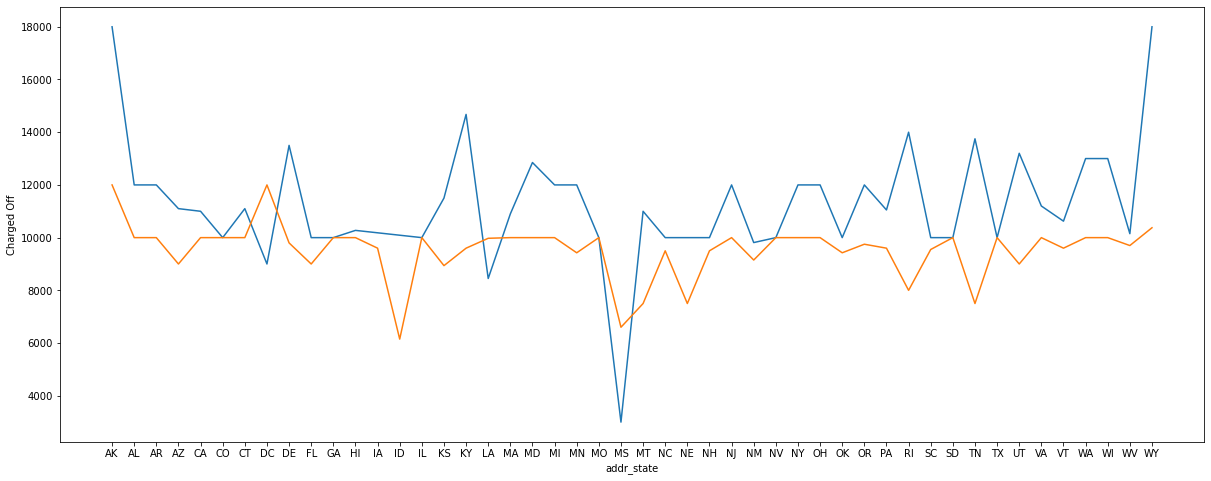

In [58]:
## Insight Region wise acceptable loan_amnt for not defaulting
df = loan_df.groupby(by=["loan_status", "addr_state"], as_index=False)["loan_amnt"].median()

temp_df = df.pivot(index="addr_state" , columns="loan_status")
temp_df.columns = ["Charged Off", "Current", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

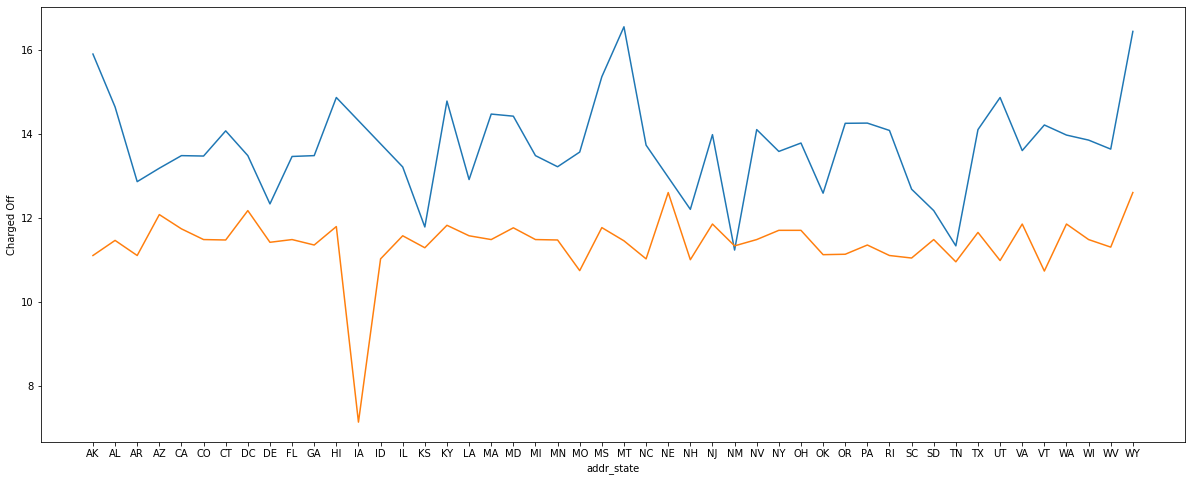

In [59]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "addr_state"], as_index=False)["int_rate"].median()

temp_df = df.pivot(index="addr_state" , columns="loan_status")
temp_df.columns = ["Charged Off", "Current", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

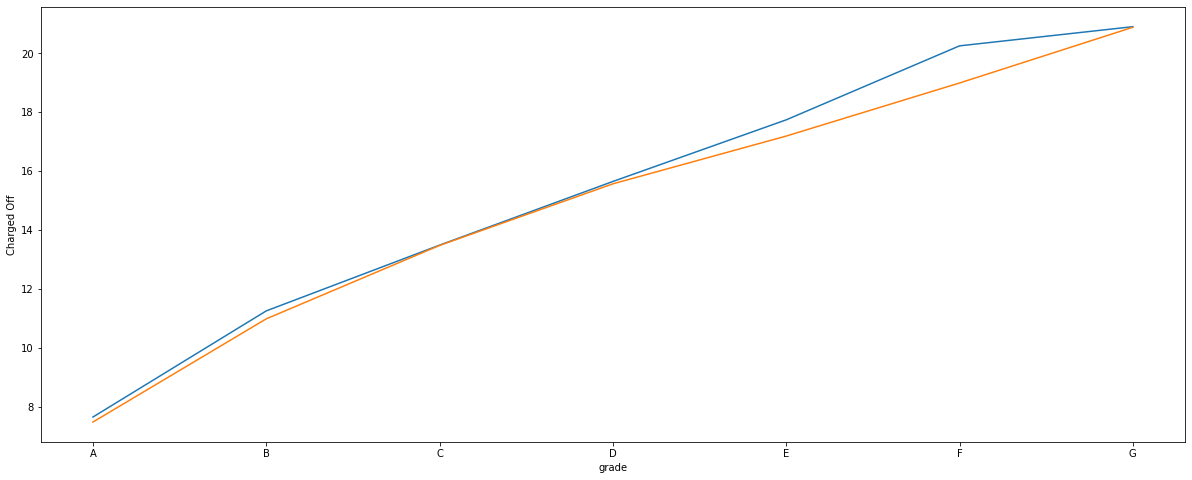

In [60]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "grade"], as_index=False)["int_rate"].median()

temp_df = df.pivot(index="grade" , columns="loan_status")
temp_df.columns = ["Charged Off", "Current", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

In [61]:
temp_df

,Charged Off,Current,Fully Paid
grade,,,
A,7.66,8.490,7.49
B,11.26,11.710,10.99
C,13.49,14.270,13.48
D,15.65,16.890,15.57
E,17.74,19.030,17.19
F,20.25,21.135,18.99
G,20.90,22.740,20.88


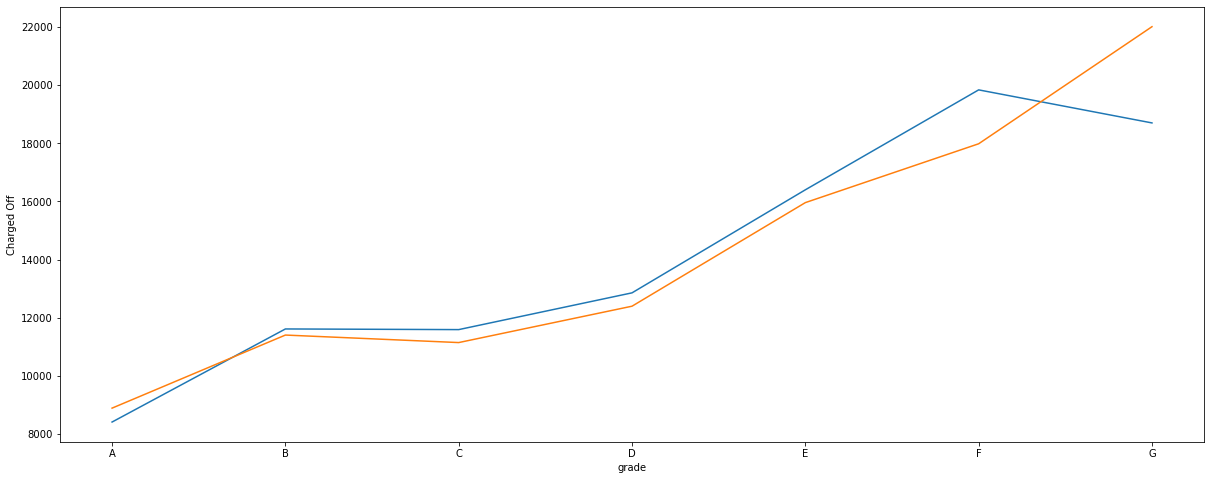

In [62]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "grade"], as_index=False)["loan_amnt"].mean()

temp_df = df.pivot(index="grade" , columns="loan_status")
temp_df.columns = ["Charged Off", "Current", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

In [63]:
temp_df

,Charged Off,Current,Fully Paid
grade,,,
A,8413.033537,10868.181818,8891.434942
B,11614.791667,17877.657005,11405.017342
C,11592.477876,16625.159236,11146.528966
D,12856.956845,15643.382353,12397.722672
E,16401.407658,19281.839623,15960.823910
F,19839.175258,24601.250000,17985.011990
G,18702.118644,21756.818182,22012.704918


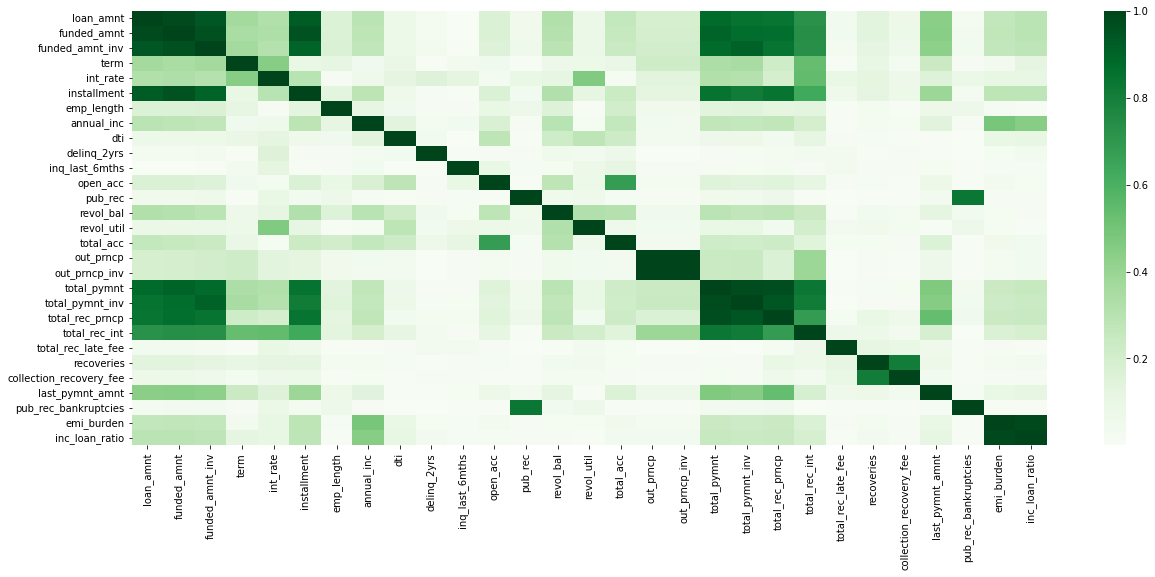

In [64]:
curr = loan_df.corr().abs()
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.heatmap(curr, cmap="Greens")
plt.show()

# no meaningful insights

# Rough